## FINAL DEMO

In [34]:
import pandas as pd
from functions import *

df_final_demo = pd.read_csv("df_final_demo.csv")

df_final_demo.head()
df_final_demo.dropna(inplace=True)

mapGenre = {'X' : 'U'}
df_final_demo["gendr"] = replace_values_df(df_final_demo["gendr"], mapGenre)

## WEB DATA

In [35]:
df_web_data1 = pd.read_csv("df_final_web_data_pt_1.csv")
df_web_data2 = pd.read_csv("df_final_web_data_pt_2.csv")

df_web_data_concat = pd.concat([df_web_data1, df_web_data2], axis=0, join='inner')

In [36]:
# Convert type object into datetime 

df_web_data_concat['date_time'] = convert_to_dateTime(df_web_data_concat['date_time'])

df_web_data_concat.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [37]:
# I turn 'step' into a discrete numeric df

map_values = {'start' : 0, 'step_1' : 1, 'step_2' : 2, 'step_3' : 3, 'confirm' : 4}

df_web_data_concat["process_step"] = replace_values_df(df_web_data_concat["process_step"], map_values)

## FINAL EXP

In [38]:
df_final_exp = pd.read_csv("df_final_experiment_clients.csv")
df_final_exp.rename(columns={"Variation" : "variation"}, inplace=True)

In [39]:
df_final_exp = drop_na_df(df_final_exp, "variation")

In [40]:
map_values2 = {'Control': 0, 'Test': 1}

df_final_exp["variation"] = replace_values_df(df_final_exp["variation"], map_values2)


## MERGE

In [41]:
df_temp1 = pd.merge(df_final_demo, df_web_data_concat, on='client_id', how='inner')

df_all = pd.merge(df_temp1, df_final_exp, on='client_id', how='inner')

In [42]:
df_all = df_all.drop("clnt_tenure_yr", axis=1)      # We don´t need this column because is derivative from clnt_tenure_mnth

In [43]:
df_all

,client_id,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,variation
0,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:51:13,1
1,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:47:50,1
2,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:46:45,1
3,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,3,2017-04-02 11:23:08,1
4,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,2,2017-04-02 11:22:24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321190,7468138,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,2,2017-03-30 23:59:15,1
321191,7468138,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,1,2017-03-30 23:58:51,1
321192,7468138,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,0,2017-03-30 23:58:40,1
321193,7468138,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,0,2017-03-30 23:55:11,1


# VER SI SON JOVENES O NO

In [44]:
df_all_no_duplicates = df_all.copy()

In [45]:
df_all_no_duplicates.drop_duplicates(subset="client_id", inplace=True)

df_all_no_duplicates

,client_id,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,variation
0,836976,73.0,60.5,U,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,4,2017-04-02 11:51:13,1
11,2304905,94.0,58.0,U,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,4,2017-05-21 11:07:16,0
17,1439522,64.0,32.0,U,2.0,52467.79,6.0,9.0,245908175_84333642537,898099666_87299892721_263146,3,2017-04-06 09:29:59,1
22,1562045,198.0,49.0,M,2.0,67454.65,3.0,6.0,391202328_71710993352,71954691_44810191073_495385,0,2017-04-06 19:03:46,1
23,5126305,145.0,33.0,F,2.0,103671.75,0.0,3.0,432077852_35036160885,942996157_39527225999_589383,0,2017-06-14 14:22:31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321157,1780858,262.0,68.5,M,3.0,372100.59,6.0,9.0,615559472_29670943967,600689000_53802784285_47549,4,2017-04-05 16:37:58,1
321169,6967120,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,4,2017-04-12 19:06:55,0
321174,5826160,249.0,56.5,F,2.0,44837.16,2.0,5.0,903851930_50402388184,842608317_42559400580_37328,4,2017-04-05 13:24:53,1
321184,8739285,229.0,69.5,F,2.0,44994.24,1.0,4.0,8756552_54841419737,101846948_96925910026_299041,4,2017-04-12 15:01:19,1


In [46]:
df_all_no_duplicates["clnt_age"].describe()

count    50487.000000
mean        47.319795
std         15.518616
min         17.000000
25%         33.500000
50%         48.000000
75%         59.500000
max         96.000000
Name: clnt_age, dtype: float64

In [47]:
df_all["clnt_age"].mode()

0    58.5
Name: clnt_age, dtype: float64

<Axes: ylabel='clnt_age'>

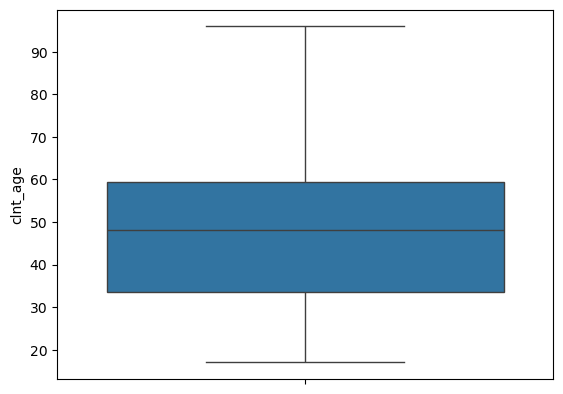

In [48]:
import seaborn as sns

sns.boxplot(data = df_all_no_duplicates['clnt_age'])

In [49]:
# Q1 = df_all_no_duplicates['clnt_age'].quantile(0.25)
# Q3 = df_all_no_duplicates['clnt_age'].quantile(0.75)
# IQR = Q3 - Q1


# edadMin = 17
# inf_lim = Q1 - 1.5*IQR
# sup_lim = Q3 + 1.5*IQR

# inf_lim, sup_lim

In [50]:
# outlier = df_all_no_duplicates['clnt_age'][(df_all_no_duplicates['clnt_age'] < inf_lim) | (df_all_no_duplicates['clnt_age'] > sup_lim) ]

# outlier         THERE ARE NO OUTLIERS

# VER SI SON NUEVOS O ANTIGUOS

In [51]:
df_all_no_duplicates["clnt_tenure_mnth"].describe()

count    50487.000000
mean       150.416365
std         81.945403
min         33.000000
25%         82.000000
50%        136.000000
75%        192.000000
max        669.000000
Name: clnt_tenure_mnth, dtype: float64

In [52]:
df_all["clnt_tenure_mnth"].mode()

0    58.0
Name: clnt_tenure_mnth, dtype: float64

<Axes: ylabel='clnt_tenure_mnth'>

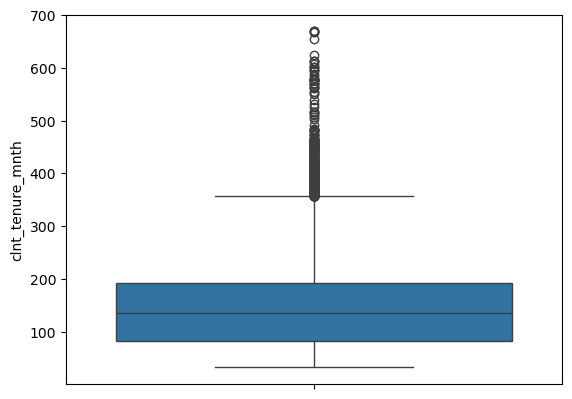

In [53]:
sns.boxplot(data = df_all_no_duplicates['clnt_tenure_mnth'])

In [54]:
Q1 = df_all_no_duplicates['clnt_tenure_mnth'].quantile(0.25)
Q3 = df_all_no_duplicates['clnt_tenure_mnth'].quantile(0.75)
IQR = Q3 - Q1


inf_lim = Q1 - 1.5*IQR
sup_lim = Q3 + 1.5*IQR

inf_lim, sup_lim

(-83.0, 357.0)

In [55]:
outlier = df_all_no_duplicates['clnt_tenure_mnth'][(df_all_no_duplicates['clnt_tenure_mnth'] < 0) | (df_all_no_duplicates['clnt_tenure_mnth'] => sup_lim) ]

outlier.shape

(995,)

In [56]:
df_all_no_out = df_all_no_duplicates[~df_all_no_duplicates['clnt_tenure_mnth'].isin(outlier)]

In [57]:
df_all_no_out["clnt_tenure_mnth"].describe()

count    49492.000000
mean       145.310171
std         74.001022
min         33.000000
25%         81.000000
50%        132.000000
75%        190.000000
max        357.000000
Name: clnt_tenure_mnth, dtype: float64

<Axes: ylabel='clnt_tenure_mnth'>

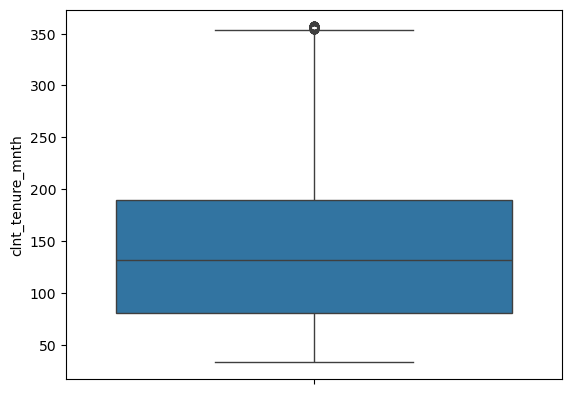

In [58]:
sns.boxplot(data = df_all_no_out['clnt_tenure_mnth'])

In [59]:
df_all_no_out['clnt_tenure_mnth'][df_all_no_out['clnt_tenure_mnth']>353.5]

977       357.0
5606      355.0
6827      355.0
7632      354.0
10213     355.0
          ...  
288166    354.0
292297    355.0
304338    355.0
309401    354.0
315653    356.0
Name: clnt_tenure_mnth, Length: 68, dtype: float64

In [60]:
Q1 = df_all_no_out['clnt_tenure_mnth'].quantile(0.25)
Q3 = df_all_no_out['clnt_tenure_mnth'].quantile(0.75)
IQR = Q3 - Q1


inf_lim = Q1 - 1.5*IQR
sup_lim = Q3 + 1.5*IQR

inf_lim, sup_lim

(-82.5, 353.5)

In [61]:
# def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
#     """
#     Automatically removes outliers based on Q1, Q3
#     """
#     for column in data.select_dtypes(include=[np.number]):
#         Q1 = data[column].quantile(0.25)
#         Q3 = data[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
#     return data

In [62]:
out_prueba = df_all_no_out['clnt_tenure_mnth'][(df_all_no_out['clnt_tenure_mnth'] < 0) | (df_all_no_out['clnt_tenure_mnth'] > sup_lim) ]
out_prueba

977       357.0
5606      355.0
6827      355.0
7632      354.0
10213     355.0
          ...  
288166    354.0
292297    355.0
304338    355.0
309401    354.0
315653    356.0
Name: clnt_tenure_mnth, Length: 68, dtype: float64